In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

%load_ext lab_black
%load_ext watermark

# 7. Metropolis: Normal-Cauchy*

Adapted from [Unit 5: norcaumet.m](https://raw.githubusercontent.com/areding/6420-pymc/main/original_examples/Codes4Unit5/norcaumet.m).

```{prf:algorithm} Metropolis-Hastings
:label: metropolis-hastings

**Inputs** Let $f(x)$ be proportional to the target pdf. $x_j$ is the current value and $q(x|x_j)$ is a proposal distribution.

**Output** An array of samples representing the target pdf.

1. Sample $x_* ∼ q(x|x_j)$.
2. Calculate the acceptance probability: 
$ρ(x_j, x_*) = min\left\{1, \frac{f(x_*)}{f(x_j)}\frac{q(x_j|x_*)}{q(x_*|x_j)}\right\}$
3. Update $x_{j+1} = x_*$ with probability $ρ(x_j, x_*)$, otherwise $x_{j+1}$ remains equal to $x_j$.

```

For this example:

$X|\theta~\sim{N}(\theta, 1)$ and $\theta~\sim {\rm Cauchy}(0, 1)$

```{note}
I often pre-generate arrays of random numbers (see ```theta_prop``` and ```unif``` variables in the below cell) because it's significantly faster. However, that only works when those numbers don't depend on the previous step in the sampling loop!
```

  0%|          | 0/1000000 [00:00<?, ?it/s]

np.mean(thetas)=1.2827787735229694
np.var(thetas)=0.8633580312967621
np.sum(accepted)/n=0.587795


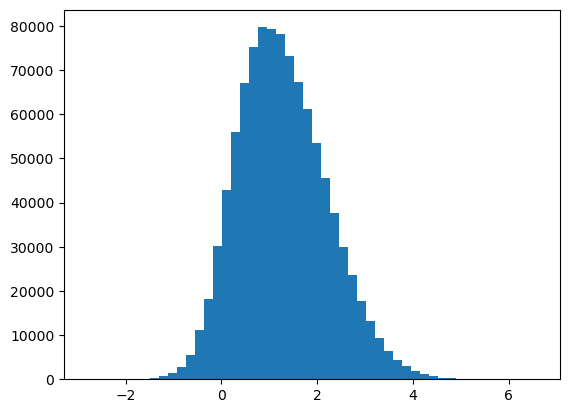

In [2]:
rng = np.random.default_rng(1)

n = 1000000  # observations
burn = 500
theta = 1  # init
thetas = np.zeros(n)
x = 2  # observed

accepted = np.zeros(n)

# generating necessary randoms as arrays is faster
theta_prop = rng.standard_normal(n) + x
unif = rng.uniform(size=n)

for i in tqdm(range(n)):
    r = (1 + theta**2) / (1 + theta_prop[i] ** 2)
    rho = min(r, 1)
    if unif[i] < rho:
        theta = theta_prop[i]
        accepted[i] = 1
    thetas[i] = theta

# thetas = thetas[burn:]

print(f"{np.mean(thetas)=}")
print(f"{np.var(thetas)=}")
print(f"{np.sum(accepted)/n=}")

plt.hist(thetas, 50)
plt.show()

  0%|          | 0/1000000 [00:00<?, ?it/s]

np.mean(thetas)=1.2710534988554747
np.var(thetas)=0.8552308319161269
np.sum(accepted)/n=0.350872


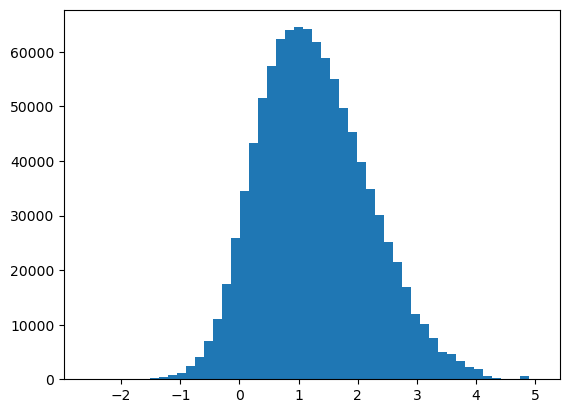

In [3]:
rng = np.random.default_rng(1)

n = 1000000
burn = 500
theta = 1
thetas = np.zeros(n)
x = 2

accepted = np.zeros(n)

theta_prop = rng.standard_normal(n)
unif = rng.uniform(size=n)


def q(theta, x):
    return np.exp(-0.5 * (x) ** 2)


def f(x, theta):
    return np.exp(-0.5 * (x - theta) ** 2) / (1 + theta**2)


for i in tqdm(range(n)):
    r = (f(x, theta_prop[i]) / f(x, theta)) * (q(x, theta)) / q(x, theta_prop[i])
    rho = min(r, 1)
    if unif[i] < rho:
        theta = theta_prop[i]
        accepted[i] = 1
    thetas[i] = theta

# thetas = thetas[burn:]

print(f"{np.mean(thetas)=}")
print(f"{np.var(thetas)=}")
print(f"{np.sum(accepted)/n=}")

plt.hist(thetas, 50)
plt.show()

In [4]:
%watermark -n -u -v -iv

Last updated: Sat Mar 18 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.9.0

numpy     : 1.24.2
matplotlib: 3.6.3

